
# TFM JULIAN MARCOS VÁZQUEZ

# ANÁLISIS CARACTERÍSTICAS DE LOS JUGADORES DEL FIFA 2019

# APRENDIZAJE SUPERVISADO - REGRESIÓN.

# Predicción de la puntuación total a partir de las características del jugador


In [65]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [66]:
# Lectura del dataset
df = pd.read_csv("Jugadores_Fifa2019_limpio.csv")
df

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_Kg,Height_cms
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.3,170
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.2,188
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.2,175
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.4,193
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,70.0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60.9,175
16639,18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,77.3,190
16640,18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,67.3,173
16641,18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,70.0,178


In [67]:
# Elimino a los porteros del dataset
df_jugadores = df[df.Position != 'GK']
df_jugadores


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_Kg,Height_cms
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.3,170
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.2,188
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.2,175
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,70.0,180
5,5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,74.1,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,60.9,175
16639,18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,77.3,190
16640,18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,67.3,173
16641,18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,70.0,178


In [68]:
#Mostrar columnas
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Weight_Kg', 'Height_cms'],
      dtype='object')

In [69]:
# Cogemos la variable y (PUntuación media del jugador)--> (Serie de pandas) como la variable a predecir, 
# y las características del jugador en la Variable X excluyendo las que corresponden a los porteros
# --> Dataframe de Pandas)

y = df['Overall']
X = df[['Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle']]

# 1. REGRESIÓN LINEAL

In [70]:
# Cargo la librería para utilizar regresión lineal 
from sklearn.linear_model import LinearRegression

In [71]:
#Creo una instancia del modelo
reg = LinearRegression()

In [72]:
#Entrego el regresor. Ajustamos en pytghon
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
#Recogemos los coeficientes en columnas para ver cuáles tienen los valores de correlación entre X e y más altos.
coef = pd.DataFrame(reg.coef_, X.columns)
coef

,0
Crossing,0.029332
Finishing,0.010408
HeadingAccuracy,-0.024602
ShortPassing,0.043695
Volleys,-0.008355
Dribbling,-0.023605
Curve,0.011685
FKAccuracy,-0.006033
LongPassing,0.006425
BallControl,0.060571


In [74]:
# En principio, parece que las características 'reactions', 'composure' y ball control' son las claves del juego

In [75]:
#Cargo la librería para hacer la separación entre los datos de test y de entrenamiento
from sklearn.model_selection import train_test_split

In [76]:
# Defino los datos de entrada y salida para test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 42)

In [77]:
# Ajuste de los datos de entrenamiento
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
# Predecimos los datos
pred = reg.predict(X_test)

Crossing


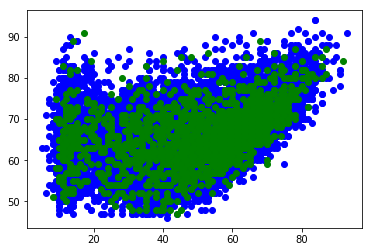

Finishing


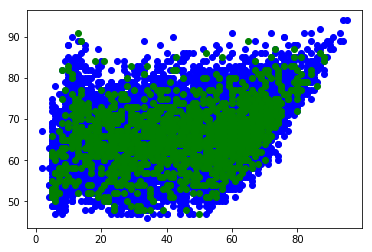

HeadingAccuracy


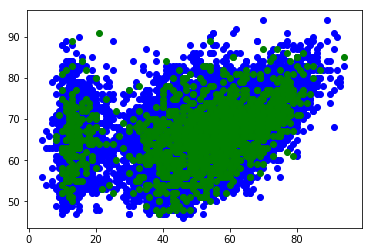

ShortPassing


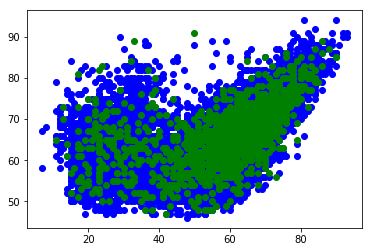

Volleys


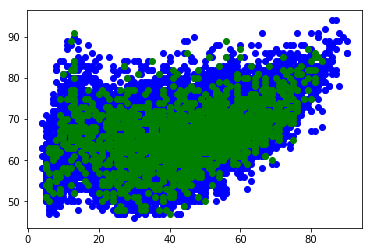

Dribbling


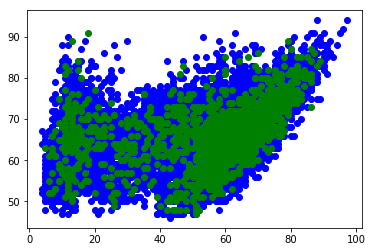

Curve


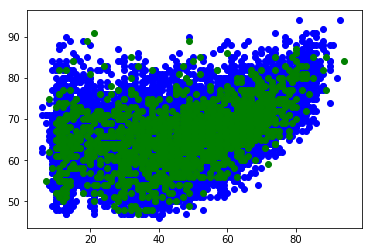

FKAccuracy


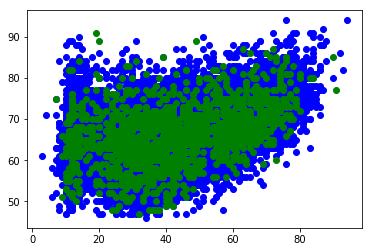

LongPassing


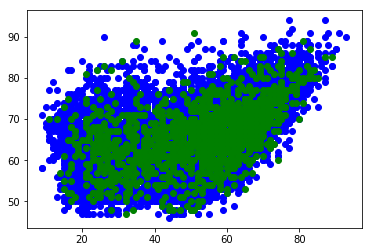

BallControl


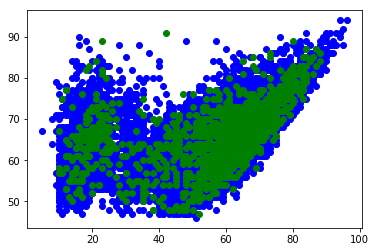

Acceleration


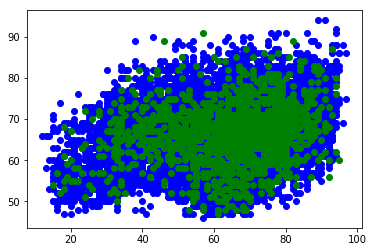

SprintSpeed


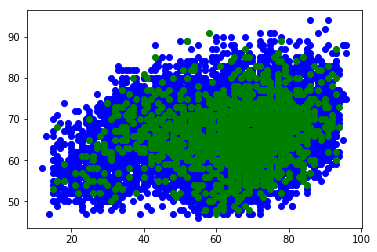

Agility


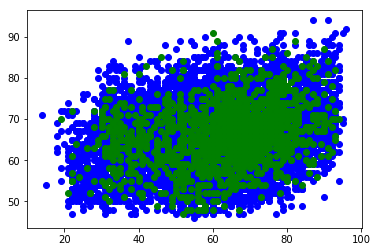

Reactions


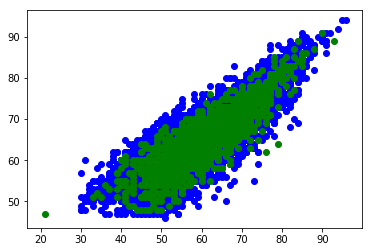

Balance


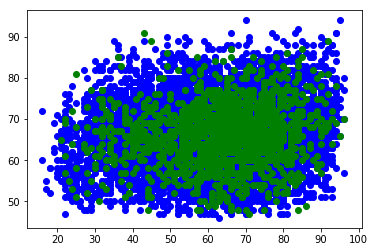

ShotPower


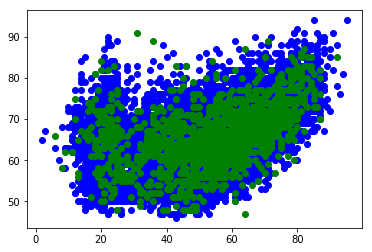

Jumping


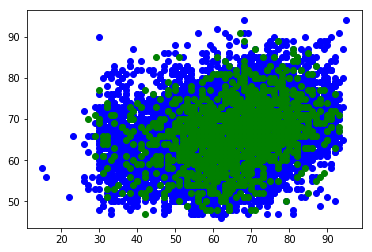

Stamina


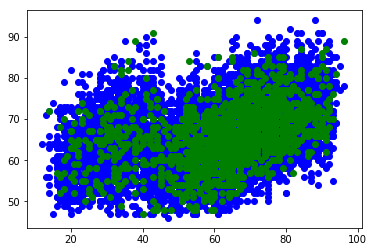

Strength


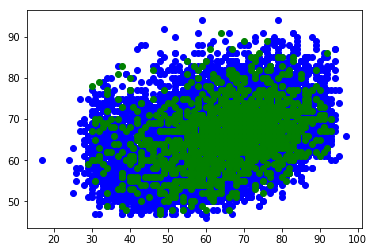

LongShots


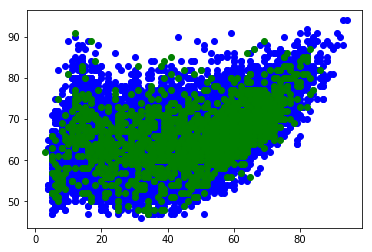

Aggression


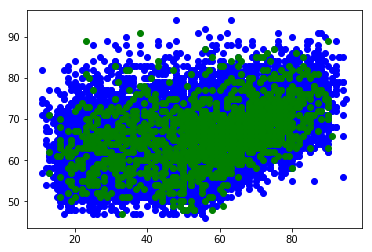

Interceptions


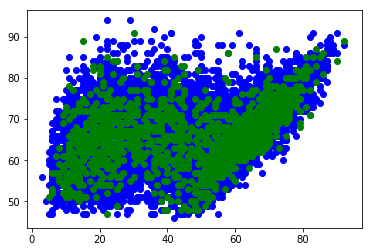

Positioning


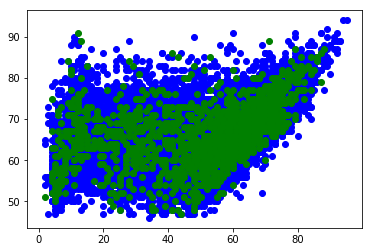

Vision


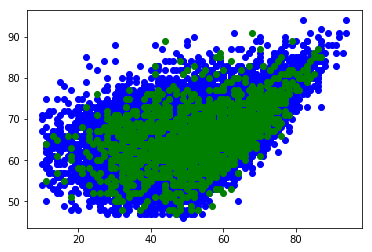

Penalties


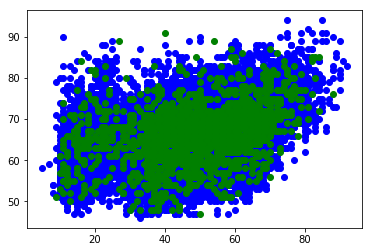

Composure


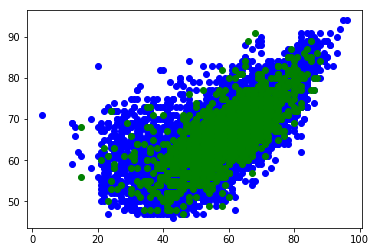

Marking


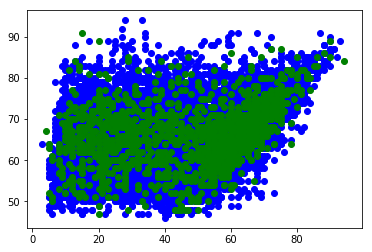

StandingTackle


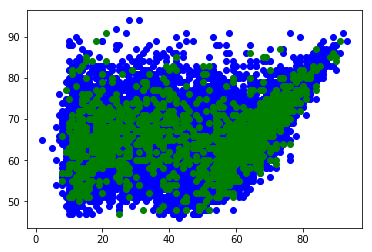

SlidingTackle


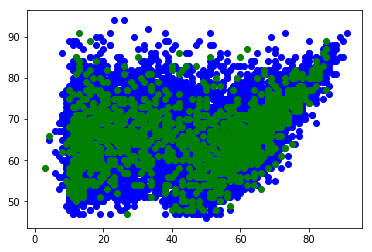

In [79]:
# Voy a ver la distribución de los datos de prueba y entrenamiento para cada característica del jugador
for i in X:
    plt.scatter(X_train[i],y_train,color='b')
    plt.scatter(X_test[i],y_test,c='g')
    print(i)
    plt.show()

# CÁLCULO DE MÉTRICAS

In [80]:
# Vamos a evaluar los datos 
from sklearn import metrics

In [81]:
# MAE: Error absoluto medio: es la suma de los valores absolutos del error
print("MAE", metrics.mean_absolute_error(y_test, pred))

MAE 2.486791489124026


In [82]:
# MAPE: Es casi lo mismo que MAE pero con el valor en %. NO está en Sklearn
np.mean(np.abs((y_test-pred)/y_test))

0.038480901378570645

In [83]:
# MSE: Error cuadrático medio, es la media de la diferencia entre los puntos reales de datos y la salida predicha,
# al cuadrado
print("MSE", metrics.mean_squared_error(y_test, pred))


MSE 9.772377268422208


In [84]:
# RMSE: Error cuadrático medio,es la raíz de la media de los errores elevados al cuadrado.
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))


RMSE 3.126080176262632


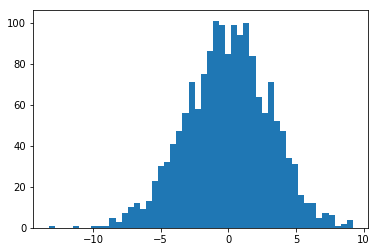

In [85]:
# Dibujo un histograma con el MAE
plt.hist(y_test-pred,bins=50);

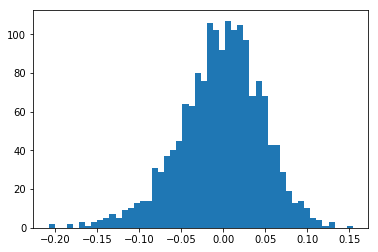

In [86]:
# Dibujo un histograma con el MAPE
plt.hist((y_test-pred)/y_test,bins=50);

Text(0, 0.5, 'Y_Predicha')

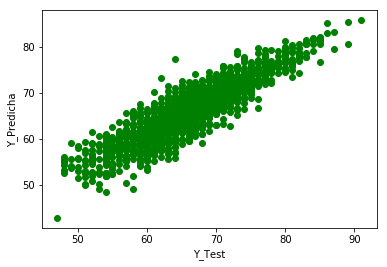

In [87]:
# Como estoy utilizando muchas variables de entrada no puedo dibujar la recta de regresión
plt.scatter(y_test, pred, color='g')
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicha')

# 2. ALGORITMO K-Neighbors

In [88]:
# Cargo la librería para el cálculo por algoritmo de K-Vecinos
from sklearn.neighbors import KNeighborsRegressor
# Creo una instancia
regk = KNeighborsRegressor(n_neighbors=4)
# Entreno los datos
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

# CÁLCULO DE MÉTRICAS PARA K-VECINOS

In [89]:
# MAE para 4 vecinos
print("MAE", metrics.mean_absolute_error(y_test,regk.predict(X_test)))

MAE 1.553903903903904


In [90]:
# Vamos a hacer el cálculo con un bucle for para ver cuál es el número de vecinos óptimo para un menor MAES
from sklearn.metrics import mean_absolute_error
maes = []
for i in range(4,50):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

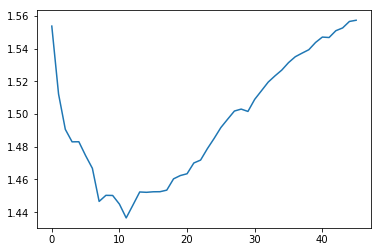

In [91]:
plt.plot(maes)

In [92]:
print("MSE", metrics.mean_squared_error(y_test, regk.predict(X_test)))

MSE 4.512539194754938


In [93]:
# Use against predictions (we must calculate the square root of the MSE)
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, regk.predict(X_test))))

RMSE 2.1242738040928097


In [94]:
# 11 es el valor con menor MAE hallada en la gráfica
regk11 = KNeighborsRegressor(n_neighbors = 11) # 11 es el valor con menor MAE hallada en la gráfica

In [95]:
regk11.fit(X_train,y_train)
mean_absolute_error(y_test,regk11.predict(X_test))

1.446573846573847

# CROSS VALIDATION

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un 
análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.
Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. 
Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo
que se llevará a cabo a la práctica.

In [96]:
# Cargo la librería
from sklearn.model_selection import cross_val_score
# Calculo la métrica para varios(5) subconjuntos, obteniendo 5 resultados para 5 training/tests
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error")

array([-23.33635195,  -7.72326248,  -8.26697097, -10.52302559,
       -23.13992013])

In [97]:
# Calculo la media de los 5 valores del valor del MSE, en negativo
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error").mean()

-14.597906222977173

In [98]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [99]:
# RMSE
np.sqrt(np.abs(cross_val_score(reg,X,y,cv=5,scoring="neg_mean_squared_error"))).mean()

3.707879936296037

In [100]:
# MAE
cross_val_score(reg,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-3.0385922376497323

# GRID SEARCH

Permite evaluar y sellecionar de forma sistemática los mejores parámetros de un modelo. En este caso lo utilizaremos para hallar el valor óptimo de vecinos

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(),
                       param_grid={"n_neighbors":np.arange(3,20)})

In [102]:
#Cogemos toda la muestra, no el train, porque Grid Search incluye el X-VAlidation
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
 # Me dice cuál es el mejor número de vecinos, aunque en este caso parece que no coincide con el resultado anterior
reg_test.best_params_

{'n_neighbors': 9}

In [104]:
reg_test.best_score_

-2.3598274342949517

In [105]:
# Buscamos el mejor modelo estimador para k-vecinos
reg_final = reg_test.best_estimator_

In [106]:
reg_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

In [107]:
# Vuelvo a hacer los cálculos para k=9

In [108]:
regk9 = KNeighborsRegressor(n_neighbors=9)
regk9.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

In [109]:
mean_absolute_error(y_test,regk9.predict(X_test))

1.4746079412746083

In [110]:
# Comparándolo para un número de vecinos=11, vemos que este método no ha acertado. MAE para 11 vecinos es mejor

# 3. ALGORITMO DE ÁRBOLES DE DECISÍON O DECISSION TREE
    

In [111]:
# Cargo la librería para el algoritmo
from sklearn.tree import DecisionTreeRegressor
# Creo una instacia
regd = DecisionTreeRegressor(max_depth=3,min_samples_leaf=4)
# Entreno los datos
regd.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
# Calculo el MAE para una profundidad de 3 y 4 hojas
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-5.215898052552574

In [113]:
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error")

array([-7.22187401, -3.31892233, -3.43746146, -4.09704062, -8.00419184])

# GRID SEARCH

In [114]:
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid = {"max_depth": np.arange(2,8),
                                      "min_samples_leaf": [10,30,50,100]
                        },cv = 5,
                        scoring = "neg_mean_absolute_error")

In [115]:
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [116]:
regd_grid.best_score_

-4.242790548077466

In [117]:
#Calculo los mejores parámetros para este algoritmo, saliendo que los mejores resultados son con profundidad 7
regd_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 100}

In [118]:
# Recalculo para los mejores parámetros obtenidos
regd7 = DecisionTreeRegressor(max_depth=7,min_samples_leaf=100)
regd7.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
# Calculo el MAE
cross_val_score(regd7,X,y,cv=5,scoring="neg_mean_absolute_error")

array([-5.82218901, -2.81377505, -2.74302397, -3.02042643, -6.81494374])

In [120]:
# Calculo el MAE
cross_val_score(regd7,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-4.2428716408427904